In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/File_Narendra Modi 2021 (cropped).jpg ....jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1590, 1161)

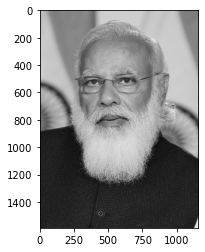

In [3]:
plt.imshow(gray, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('./open_cv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./open_cv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[198, 265, 629, 629]], dtype=int32)

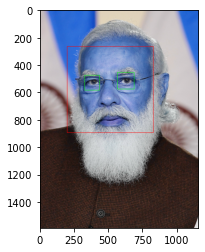

In [5]:
(x,y,w,h) = faces[0]
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [6]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

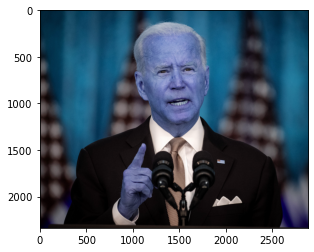

In [7]:
original_image = cv2.imread('./test_images/Afghanistan_ To rebound after the....jpg')
plt.imshow(original_image)

In [8]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Afghanistan_ To rebound after the....jpg')
cropped_image

In [16]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/boris johnson - Google Search',
 './dataset/xi jinping - Google Search',
 './dataset/narendra modi - Google Search',
 './dataset/biden - Google Search',
 './dataset/putin - Google Search']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
#for img_dir in img_dirs:
   # for entry in os.scandir(img_dir):
      #  print(entry.path)
       # image_path=entry.path.split('.')[-1]
        #print(image_path)
       # if image_path != 'jpg'and image_path !='jpeg':
           # print(image_path)
            #os.remove(entry.path)

In [19]:
cropped_image_dirs = []
leader_names_dict = {}

for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('/')[-1]
    print(leader_name)
    
    leader_names_dict[leader_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = leader_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            leader_names_dict[leader_name].append(cropped_file_path)
            count += 1    

boris johnson - Google Search
Generating cropped images in folder:  ./dataset/cropped/boris johnson - Google Search
xi jinping - Google Search
Generating cropped images in folder:  ./dataset/cropped/xi jinping - Google Search
narendra modi - Google Search
Generating cropped images in folder:  ./dataset/cropped/narendra modi - Google Search
biden - Google Search
Generating cropped images in folder:  ./dataset/cropped/biden - Google Search
putin - Google Search
Generating cropped images in folder:  ./dataset/cropped/putin - Google Search


In [20]:
#from stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

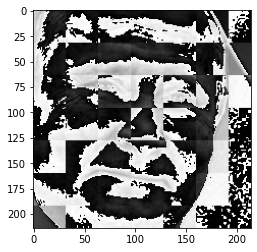

In [21]:
cropped_img = np.array(roi_color)
cropped_img.shape
#plt.imshow(cropped_img)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
leader_names_dict 

{'boris johnson - Google Search': ['./dataset/cropped/boris johnson - Google Search/boris johnson - Google Search1.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search2.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search3.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search4.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search5.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search6.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search7.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search8.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search9.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search10.png',
  './dataset/cropped/boris johnson - Google Search/boris johnson - Google Search11.png

In [23]:
class_dict={}
count=0
for leader_name in leader_names_dict.keys():
    class_dict[leader_name]=count
    count+=1
class_dict

{'boris johnson - Google Search': 0,
 'xi jinping - Google Search': 1,
 'narendra modi - Google Search': 2,
 'biden - Google Search': 3,
 'putin - Google Search': 4}

In [96]:
x=[]
y=[]
for leader_name,training_files in leader_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[leader_name])

[ WARN:0@25137.654] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./dataset/cropped/boris johnson - Google Search/boris johnson - Google Search5.png'): can't open/read file: check file path/integrity
[ WARN:0@25137.654] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./dataset/cropped/boris johnson - Google Search/boris johnson - Google Search6.png'): can't open/read file: check file path/integrity
[ WARN:0@25137.667] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./dataset/cropped/boris johnson - Google Search/boris johnson - Google Search9.png'): can't open/read file: check file path/integrity
[ WARN:0@25137.743] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./dataset/cropped/boris jo

In [99]:
len(x[0])

4096

In [100]:
x[0]

array([[ 73],
       [ 86],
       [101],
       ...,
       [183],
       [  0],
       [  0]], dtype=uint8)

In [101]:
x=np.array(x).reshape(len(x),4096).astype(float)

In [102]:
x[0]

array([ 73.,  86., 101., ..., 183.,   0.,   0.])

In [103]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7777777777777778

In [106]:
len(x_test)

45

In [107]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       1.00      0.82      0.90        11
           2       1.00      0.86      0.92         7
           3       0.62      0.62      0.62         8
           4       0.65      1.00      0.79        11

    accuracy                           0.78        45
   macro avg       0.81      0.76      0.77        45
weighted avg       0.81      0.78      0.78        45



In [108]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [109]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [111]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.803134,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635897,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.803704,{'logisticregression__C': 5}


In [112]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [114]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9111111111111111

In [115]:
best_clf = best_estimators['logistic_regression']

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 6,  0,  0,  2,  0],
       [ 0,  9,  0,  1,  1],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 11]])

Text(69.0, 0.5, 'Truth')

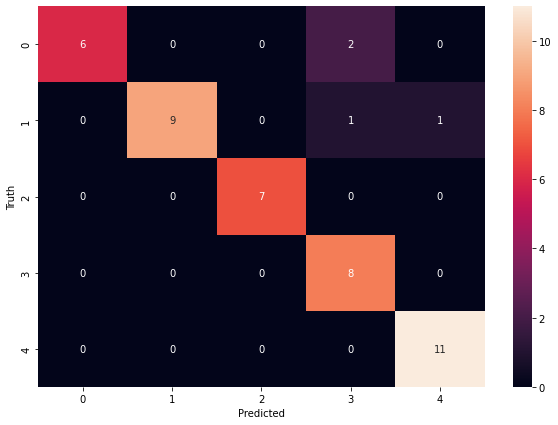

In [117]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
class_dict

{'boris johnson - Google Search': 0,
 'xi jinping - Google Search': 1,
 'narendra modi - Google Search': 2,
 'biden - Google Search': 3,
 'putin - Google Search': 4}

In [119]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [120]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))